In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [125]:
from patsy import dmatrices

from scipy import stats

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 

import statsmodels.api as sm


In [26]:
# Load data
weekly_df = pd.read_csv('./data/Smarket.csv', index_col=0)

# Check for missing data
assert weekly_df.isnull().sum().sum() == 0
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [33]:
weekly_df['Direction'] = [1 if i == 'Up' else 0 for i in weekly_df['Direction']]

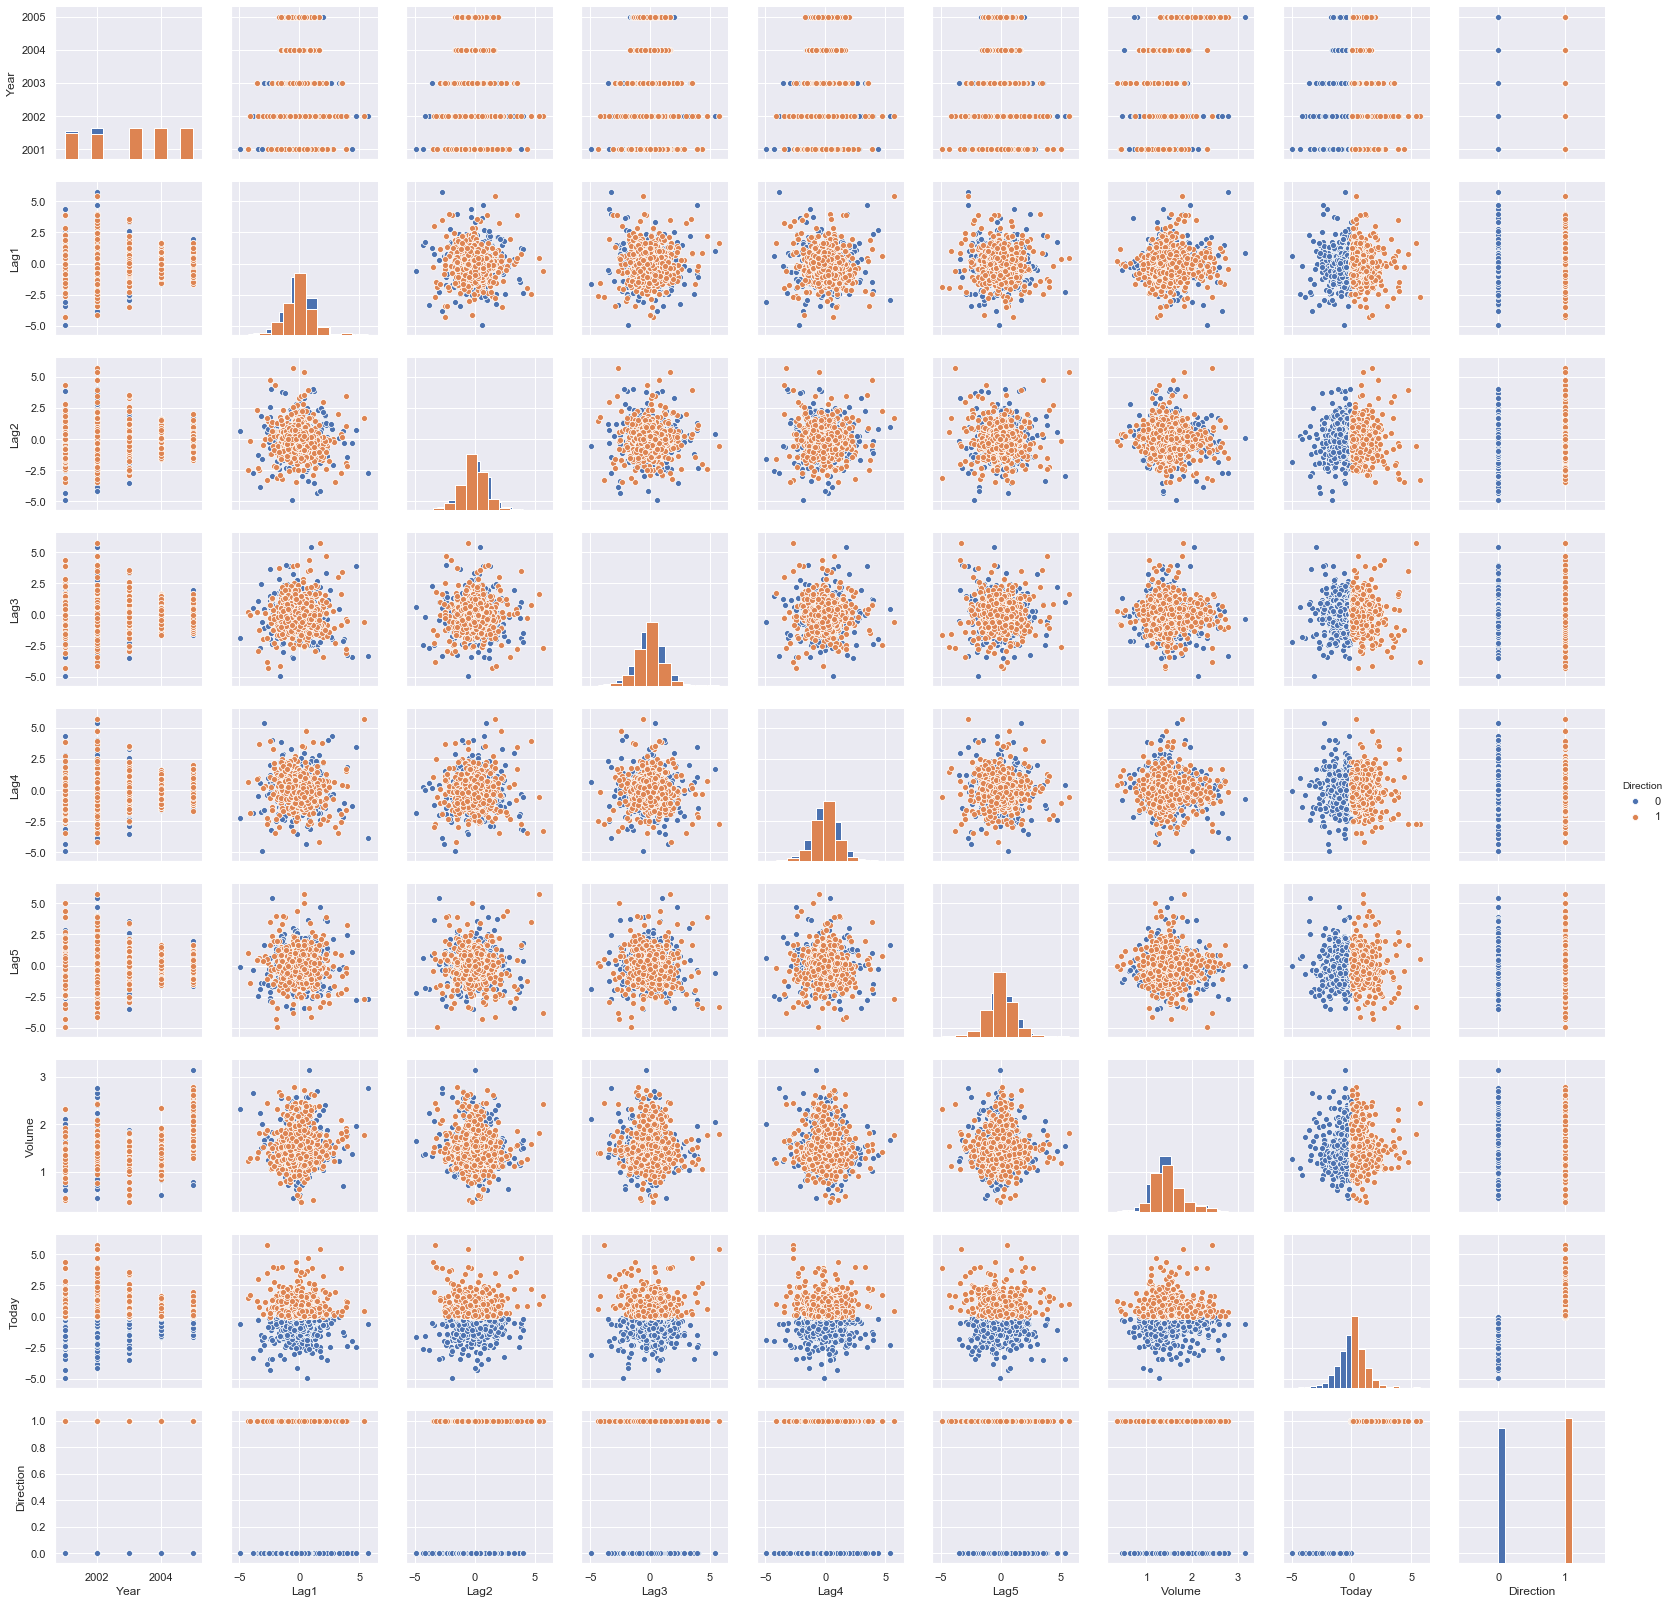

In [34]:
sns.set()
sns.pairplot(weekly_df, height = 2.5, diag_kind='hist', hue='Direction')
plt.show()

In [35]:
all_features = weekly_df.columns

In [36]:
y, X = dmatrices(f"Direction ~ {'+'.join(all_features[1:-2])}", 
                 data=weekly_df, return_type='dataframe')
mod = sm.Logit(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Mar 2020   Pseudo R-squ.:                0.002074
Time:                        11:43:20   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [37]:
mod_probs = res.predict()
mod_probs[:5]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116])

In [77]:
mod_probs = [1 if i > 0.5 else 0 for i in mod_probs]
confusion_matrix(weekly_df['Direction'], mod_probs)

array([[145, 457],
       [141, 507]])

In [78]:
np.mean(mod_probs == weekly_df['Direction'])

0.5216

In [72]:
train = weekly_df[weekly_df['Year'] < 2005]
test = weekly_df[weekly_df['Year'] >= 2005]

In [48]:
all_features[1:-2]

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')

In [75]:
y_train, X_train = dmatrices(f"Direction ~ {'+'.join(all_features[1:-2])}", 
                 data=train, return_type='dataframe')

y_test, X_test = dmatrices(f"Direction ~ {'+'.join(all_features[1:-2])}", 
                 data=test, return_type='dataframe')

mod = sm.Logit(y_train, X_train)    # Describe model
res1 = mod.fit()       # Fit model
print(res1.summary())   # Summarize model

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Mar 2020   Pseudo R-squ.:                0.001562
Time:                        18:00:16   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.

In [76]:
probs = res1.predict(X_test)

In [80]:
probs = [1 if i > 0.5 else 0 for i in probs]
confusion_matrix(y_test, probs)

array([[77, 34],
       [97, 44]])

In [84]:
np.mean(probs == y_test.values)

0.47732426303854875

### Fit smaller model

In [85]:
y_train, X_train = dmatrices(f"Direction ~ Lag1+Lag2", 
                 data=train, return_type='dataframe')

y_test, X_test = dmatrices(f"Direction ~ Lag1+Lag2", 
                 data=test, return_type='dataframe')

mod = sm.Logit(y_train, X_train)    # Describe model
res2 = mod.fit()       # Fit model
print(res2.summary())   # Summarize model

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Mar 2020   Pseudo R-squ.:                0.001347
Time:                        18:04:46   Log-Likelihood:                -690.70
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.3939
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0322      0.063      0.508      0.611      -0.092       0.156
Lag1          -0.0556      0.

In [86]:
probs = res2.predict(X_test)

In [87]:
probs = [1 if i > 0.5 else 0 for i in probs]
confusion_matrix(y_test, probs)

array([[ 35,  76],
       [ 35, 106]])

In [88]:
np.mean(probs == y_test.values)

0.5264550264550265

## LDA

In [93]:
y_train, X_train = dmatrices(f"Direction ~ Lag1+Lag2", 
                 data=train, return_type='dataframe')

y_test, X_test = dmatrices(f"Direction ~ Lag1+Lag2", 
                 data=test, return_type='dataframe')

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train.values.ravel())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [105]:
pd.DataFrame(clf_lda.priors_, columns=["Prior probabilities"], index=['Down', "Up"])

,Prior probabilities
Down,0.491984
Up,0.508016


In [110]:
#Group means
pd.DataFrame(clf_lda.means_, columns=["Intercept","Lag1", "Lag2"], index=['Down', "Up"])

,Intercept,Lag1,Lag2
Down,1.0,0.042790,0.033894
Up,1.0,-0.039546,-0.031325


In [115]:
#Coefficients of linear discriminants:
pd.DataFrame(clf_lda.scalings_, columns=["LD1"], index=["Intercept","Lag1", "Lag2"])

,LD1
Intercept,0.000000
Lag1,-0.642019
Lag2,-0.513529


In [117]:
probs = clf_lda.predict(X_test)

In [123]:
pd.DataFrame(confusion_matrix(y_test, probs).T, columns=["Down","Up"], index=["Down","Up"])

,Down,Up
Down,35,35
Up,76,106


In [119]:
np.mean(probs == y_test.values)

0.5264550264550265

## KNN

In [135]:
clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [136]:
probs = clf_knn.predict(X_test)

In [137]:
pd.DataFrame(confusion_matrix(y_test, probs).T, columns=["Down","Up"], index=["Down","Up"])

,Down,Up
Down,43,58
Up,68,83


In [138]:
np.mean(probs == y_test.values)

0.5118102796674225